# Pulizia del dataframe di training


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV
import warnings

def mediacol(df):
     for col in df.columns:
        if df[col].dtype == 'object':
            # Converte la notazione scientifica con virgola in punto
            df[col] = df[col].str.replace(',', '.', regex=False)
        # Converte in numerico, gli errori diventano NaN (Not a Number)
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Calcola la media della colonna (ignorando NaN) e arrotonda
        media_col = df[col].mean().round(0)
        
        # Se la media è un numero valido, sostituisce i NaN con la media
        if not np.isnan(media_col):
            df[col] = df[col].fillna(media_col)
    
     return df

def colabs(df):
    for col in df.columns:
        df[col] = df[col].abs()
    return df

def puliziadf(file_path):
    df = pd.read_csv(file_path, sep = ';')
    clean_df = df.copy()
    clean_df= clean_df[clean_df['Label'].notnull() & (clean_df['Label'] != '')] #rimuove le righe con Label nullo o stringa vuota prima di imettere i valori medi
    clean_df = mediacol(clean_df)
    clean_df = colabs(clean_df)
     
    posts_col = '#postshared'
    urls_col = '#urlshared'
    photos_col = '#photos/videos'

    # Evita la divisione per zero. Inizializza le colonne a 0.
    clean_df['fpurls'] = 0.0
    clean_df['fpphotos/videos'] = 0.0
        
    # Calcola la frazione solo dove il numero di post è maggiore di zero
    mask = clean_df[posts_col] > 0
    clean_df.loc[mask, 'fpurls'] = (clean_df.loc[mask, urls_col] / clean_df.loc[mask, posts_col]).round(3)
    clean_df.loc[mask, 'fpphotos/videos'] = (clean_df.loc[mask, photos_col] / clean_df.loc[mask, posts_col]).round(3)
    clean_df.to_csv('training_manual.csv', sep=';', index=False)

    return clean_df



In [14]:
training_df =pd.read_csv('training.csv', sep=';')
print(f"Dimensioni dataset originale: {training_df.shape}")
print("Anteprima dataset training:")
training_df


Dimensioni dataset originale: (550, 15)
Anteprima dataset training:


,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
0,1,39,300,907.0,200.0,1000,850.0,922.0,49,55,56.0,47.0,40.0,14.0,1
1,2,150,350,30.0,300.0,300,100.0,290.0,33,96,5.0,12.0,10.0,4.0,0
2,3,300,450,50.0,465.0,500,150.0,450.0,2,84,4.0,15.0,15.0,7.0,0
3,4,25,110,660.0,350.0,2050,2000.0,2050.0,"9,76E+13",1,7.0,3.0,54.0,21.0,1
4,5,24,100,150.0,800.0,950,1000.0,900.0,"1,05E+13","9,47E+13",66.0,5.0,55.0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,547,48,33,965.0,1298.0,1987,1456.0,1982.0,"7,33E+13","9,97E+13",1.0,491.0,46.0,22.0,1
546,548,45,44,987.0,2000.0,3038,2030.0,3030.0,"6,68E+13","9,97E+13",102.0,492.0,45.0,29.0,1
547,549,43,55,1156.0,2489.0,3346,2410.0,3345.0,"7,20E+13","1,00E+13",103.0,49.0,46.0,25.0,1
548,550,23,67,1489.0,2132.0,3126,2130.0,3120.0,"6,81E+13","9,98E+13",92.0,48.0,47.0,22.0,1


In [15]:
training_clean = puliziadf('training.csv')


training_clean 


,profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
0,1,39,300,907.0,200.0,1000.0,850.0,922.0,0.850,0.922,56.0,47.0,40.0,14.0,1.0
1,2,150,350,30.0,300.0,300.0,100.0,290.0,0.333,0.967,5.0,12.0,10.0,4.0,0.0
2,3,300,450,50.0,465.0,500.0,150.0,450.0,0.300,0.900,4.0,15.0,15.0,7.0,0.0
3,4,25,110,660.0,350.0,2050.0,2000.0,2050.0,0.976,1.000,7.0,3.0,54.0,21.0,1.0
4,5,24,100,150.0,800.0,950.0,1000.0,900.0,1.053,0.947,66.0,5.0,55.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,547,48,33,965.0,1298.0,1987.0,1456.0,1982.0,0.733,0.997,1.0,491.0,46.0,22.0,1.0
546,548,45,44,987.0,2000.0,3038.0,2030.0,3030.0,0.668,0.997,102.0,492.0,45.0,29.0,1.0
547,549,43,55,1156.0,2489.0,3346.0,2410.0,3345.0,0.720,1.000,103.0,49.0,46.0,25.0,1.0
548,550,23,67,1489.0,2132.0,3126.0,2130.0,3120.0,0.681,0.998,92.0,48.0,47.0,22.0,1.0


       #friends  #following  #community  #postshared  #urlshared  \
count    549.00      549.00      549.00       549.00      549.00   
mean    1156.17     1157.89      121.52      1005.54      224.01   
std      624.20      631.50      223.62       665.03      542.24   
min        9.00        1.00       12.00        76.00       11.00   
25%      852.00      846.00       37.00       564.00       37.00   
50%     1230.00     1198.00       54.00       802.00       47.00   
75%     1490.00     1532.00       66.00      1250.00       65.00   
max     5554.00     5312.00     1489.00      3896.00     2956.00   

       #photos/videos  avgcomment/post  likes/post  tags/post  #tags/post  
count          549.00           549.00      549.00     549.00      549.00  
mean           965.23           290.17      290.34      40.07       15.16  
std            659.28           269.23      590.95      16.56        6.00  
min             65.00             0.00        1.00      10.00        1.00  
25%    

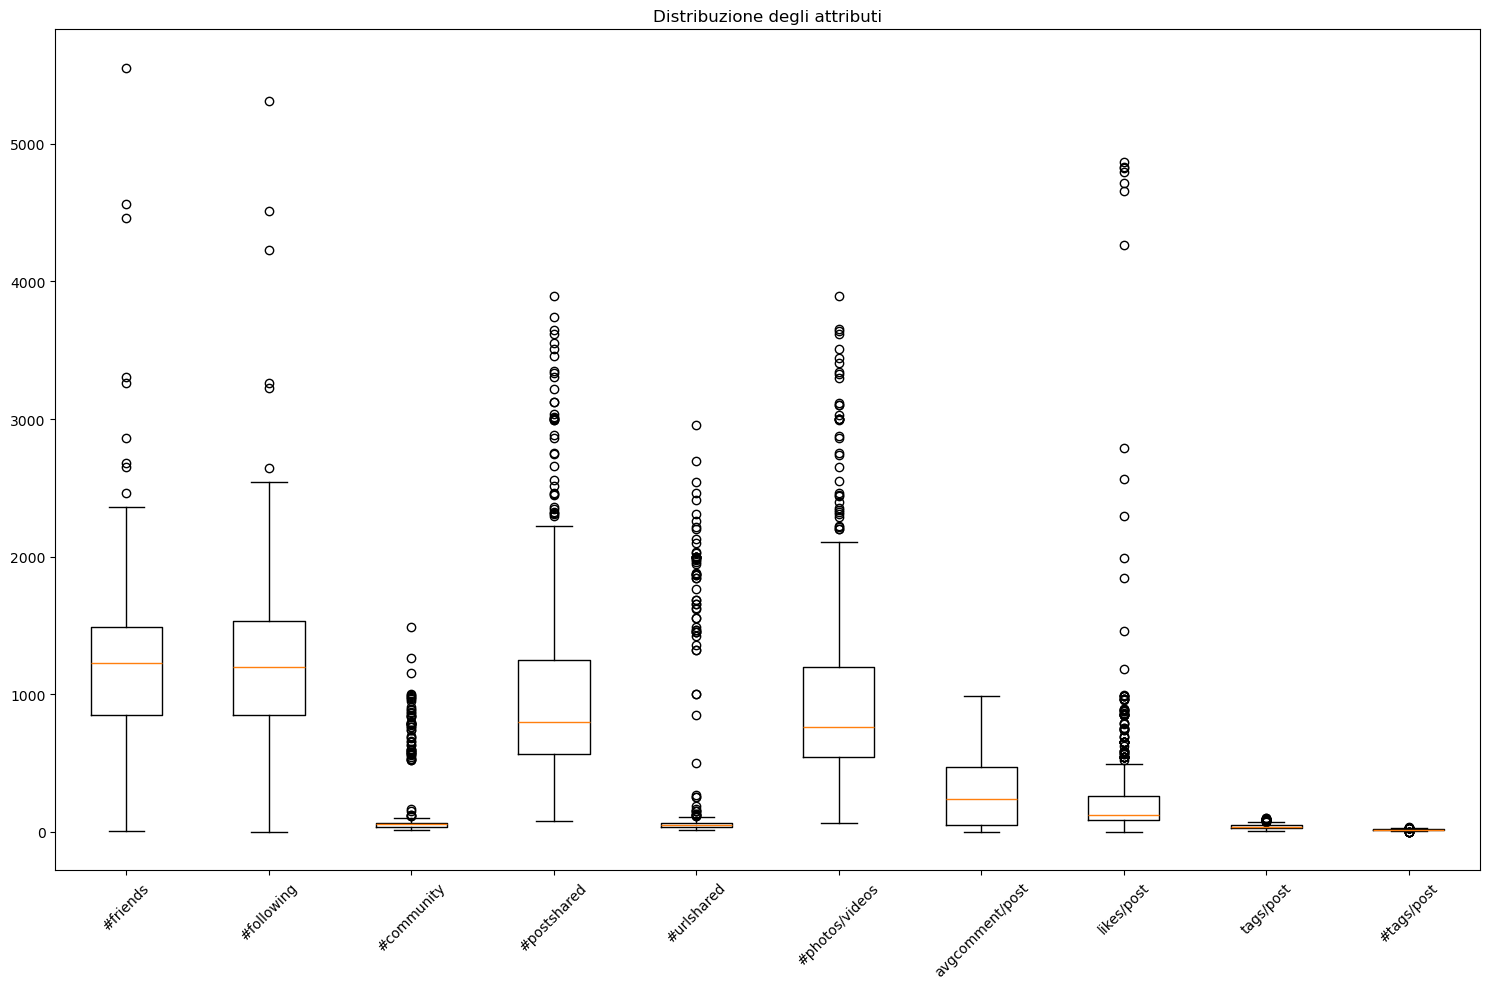

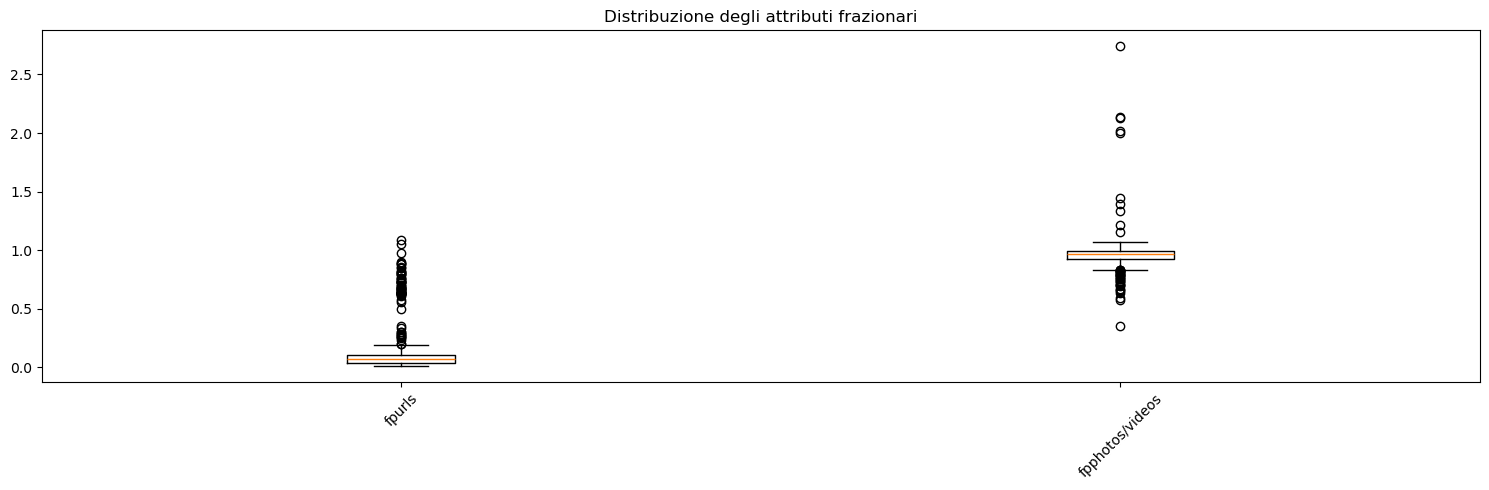

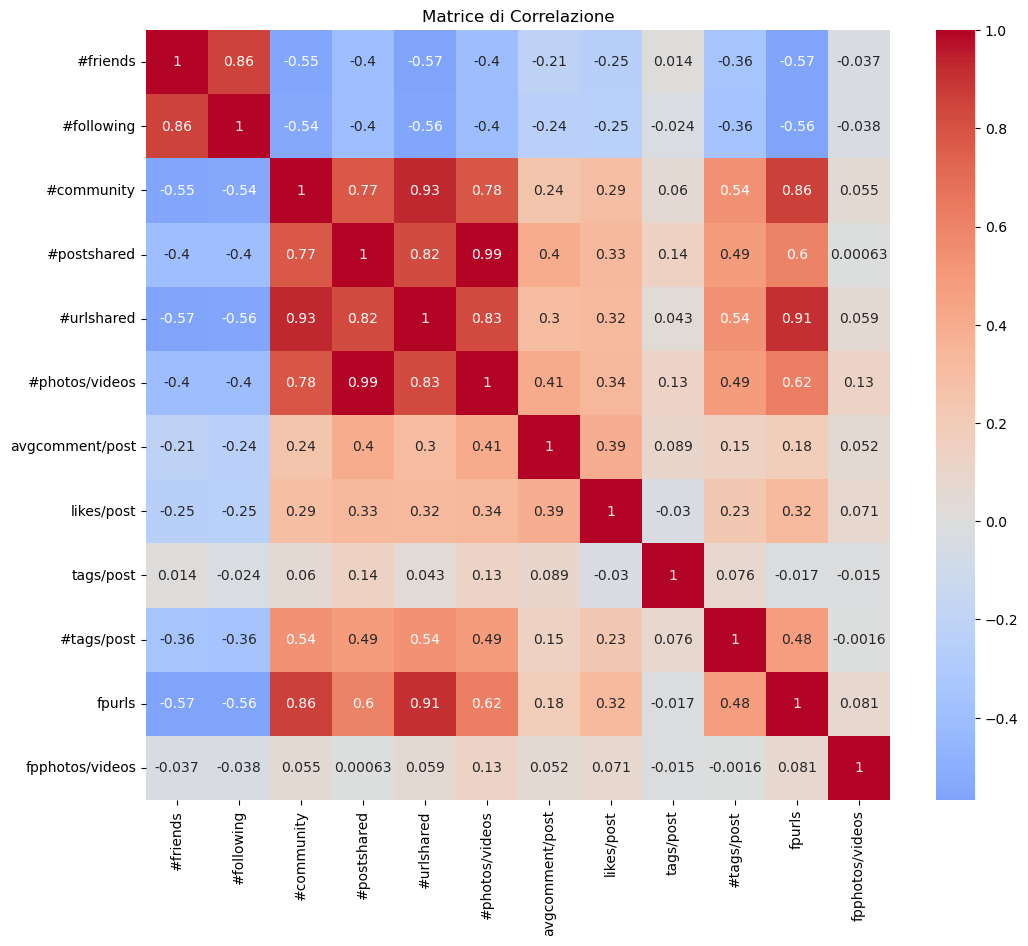

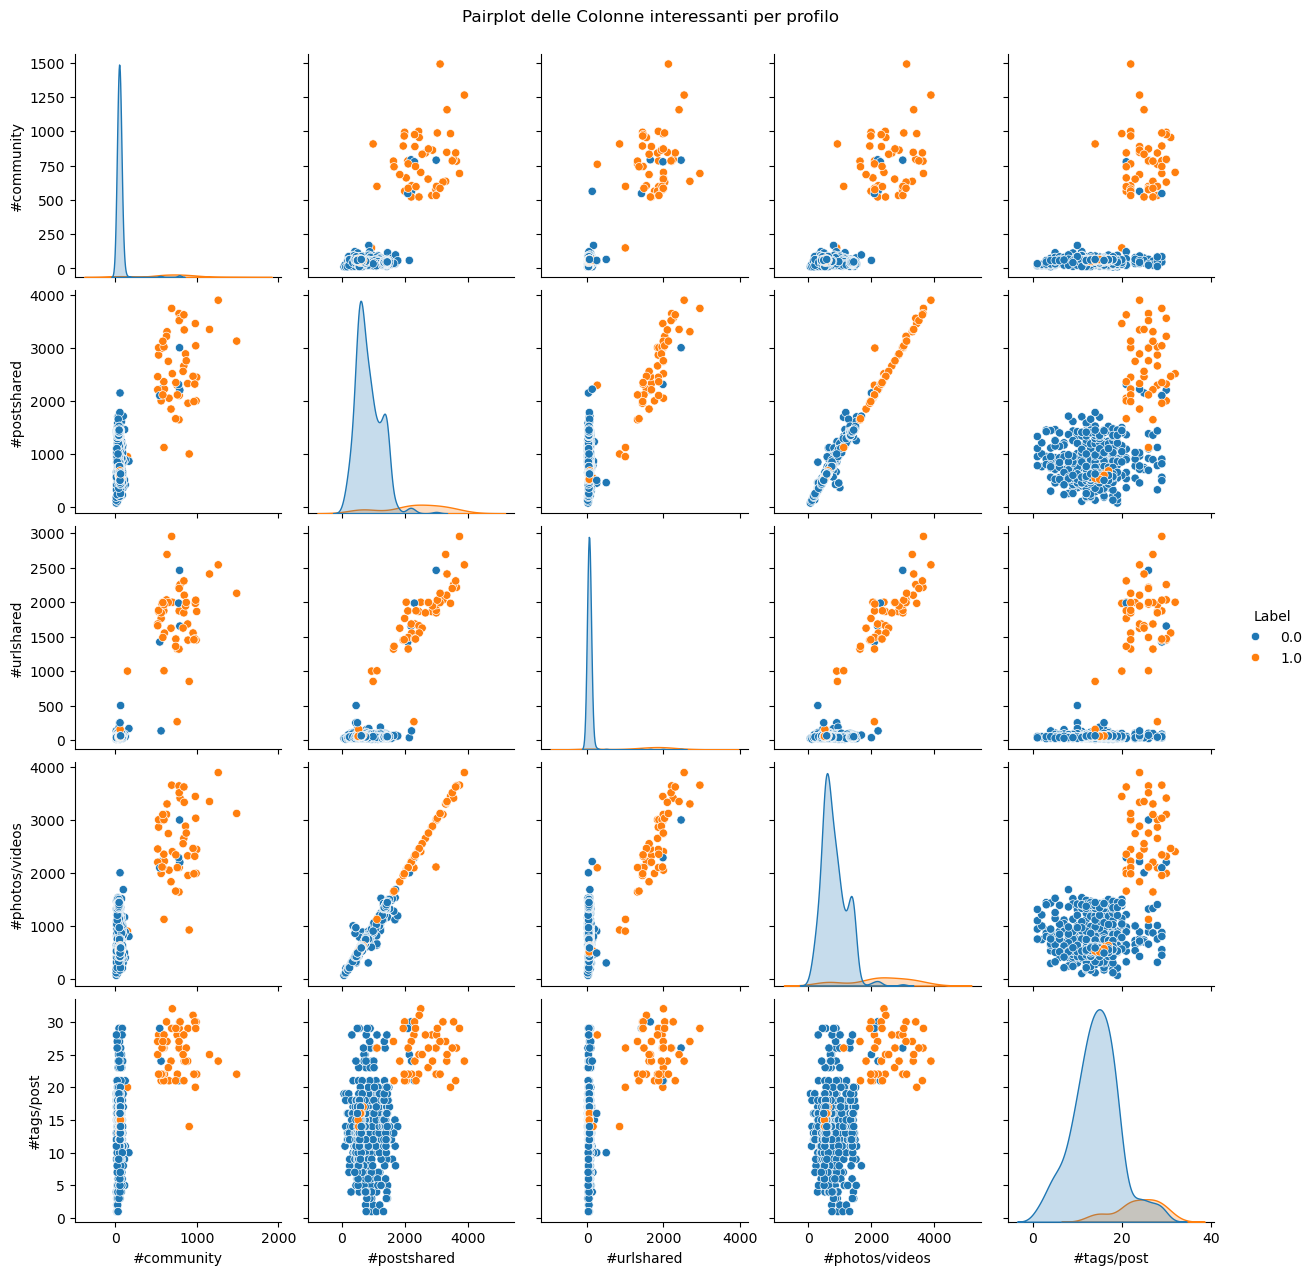

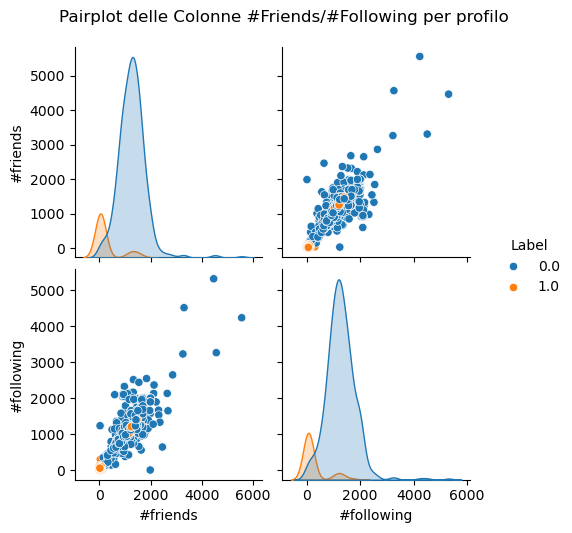

In [16]:
# 1. Boxplot
numeric_features = ['#friends', '#following', '#community', '#postshared', '#urlshared', '#photos/videos', 'avgcomment/post', 'likes/post', 'tags/post', '#tags/post']
fractions = ['fpurls', 'fpphotos/videos']
print(training_clean[numeric_features].describe().round(2))
plt.figure(figsize=(15, 10))
plt.boxplot([training_clean[feature] for feature in numeric_features])
plt.title('Distribuzione degli attributi')
plt.xticks(ticks=range(1, len(numeric_features) + 1), labels=numeric_features, rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.boxplot([training_clean[fraction] for fraction in fractions])
plt.title('Distribuzione degli attributi frazionari')
plt.xticks(ticks=range(1, len(fractions) + 1), labels=fractions, rotation=45)
plt.tight_layout()
plt.show()


# 2. Matrice di correlazione
plt.figure(figsize=(12, 10))
corr_matrix = training_clean[numeric_features+fractions].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice di Correlazione')
plt.show()

# 3. Pairplot per le feature principali dalla matrice di correlazione

# Pairplot delle principali feature
intersentig_col= ['#community', '#postshared', '#urlshared', '#photos/videos', '#tags/post']
friend_follow_col = ['#friends', '#following']
sns.pairplot(training_clean[intersentig_col + ['Label']], hue = 'Label')
plt.suptitle('Pairplot delle Colonne interessanti per profilo', y=1.02)
plt.show()
sns.pairplot(training_clean[friend_follow_col+ ['Label']], hue = 'Label')
plt.suptitle('Pairplot delle Colonne #Friends/#Following per profilo', y = 1.05)
plt.show()



In [17]:
#Inilizzazione parametri
feature_cols = ['#friends', '#following', '#community', '#postshared', '#urlshared', 
                '#photos/videos', 'avgcomment/post', 'likes/post', 'tags/post', '#tags/post', 'fpurls', 'fpphotos/videos']

X = training_clean[feature_cols].values
y = training_clean['Label'].values

# Normalizzazione
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

#split sul set normalizzato
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_scaled, y, test_size = 0.3, random_state = 15, stratify = y)


print(f"Train: {X_train.shape}, Test: {X_test.shape}")



Train: (384, 12), Test: (165, 12)


              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       144
         1.0       0.85      0.81      0.83        21

    accuracy                           0.96       165
   macro avg       0.91      0.89      0.90       165
weighted avg       0.96      0.96      0.96       165



<Figure size 800x600 with 0 Axes>

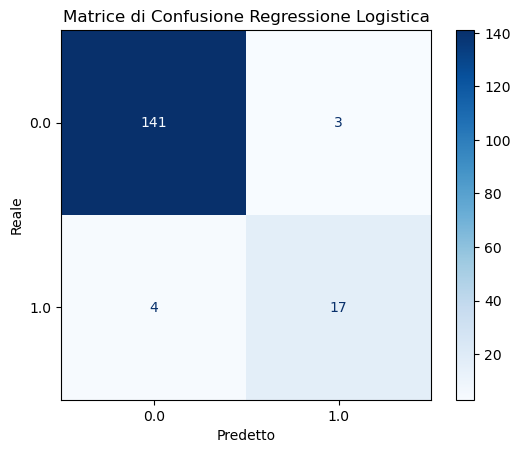

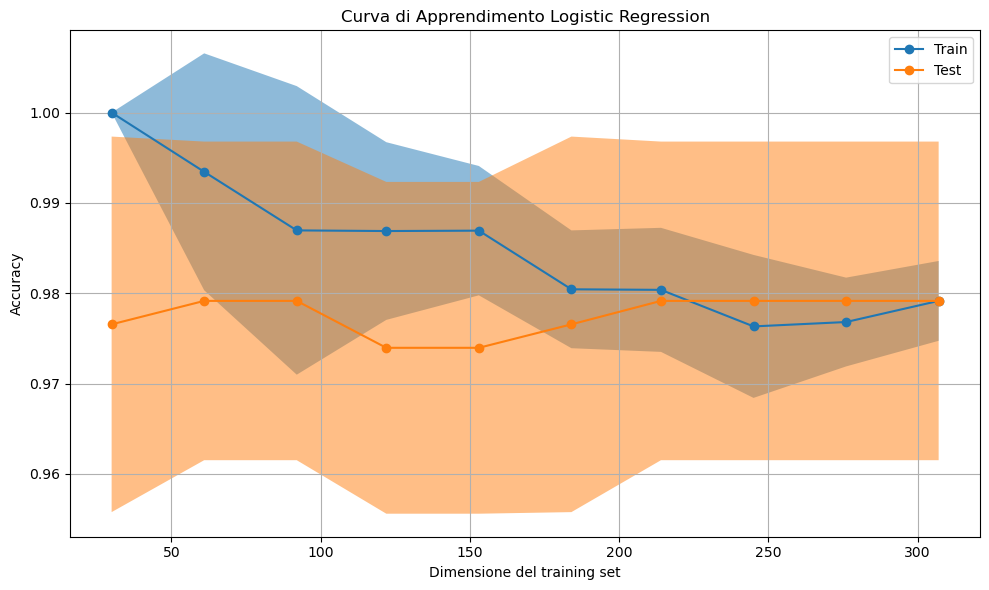

In [18]:
#Logistic Regression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LearningCurveDisplay

# Prepariamo i dati
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1500))
pipe.fit(X_train, y_train)

# Predizioni
y_pred = pipe.predict(X_test)
# Valutazione
print(classification_report(y_test, y_pred))

'''
# Definizione della griglia degli iperparametri
param_grid = {
    'penalty':      ['l1', 'l2', 'elasticnet', 'none'], #Questo parametro specifica il tipo di penalità di regolarizzazione applicata ai coefficienti del modello.
    'C':            [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], #Questo parametro controlla l'intensità della regolarizzazione, più è alto e più il modello sarà 'stretto' al training set
    'solver':       ['saga', 'lbfgs'],   #Questo parametro specifica l'algoritmo usato per ottimizzare i coefficienti del modello
    'class_weight': [None, 'balanced'], #Questo parametro è usato per gestire dataset sbilanciati, dove una classe ha significativamente più campioni rispetto a un'altra.
    'l1_ratio':     [0, 0.5, 1]  # rilevante solo se penalty='elasticnet'
}

param_grid = [
    # Combinazioni per 'lbfgs'
    {'penalty': ['l2', 'none'],
     'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
     'solver': ['lbfgs'],
     'class_weight': [None, 'balanced'],
     'l1_ratio': [None] # Non rilevante, ma si può mettere per completezza
    },
    # Combinazioni per 'saga' (che supporta tutto)
    {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
     'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
     'solver': ['saga'],
     'class_weight': [None, 'balanced'],
     'l1_ratio': [0, 0.5, 1]
    }
]
'''
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice di Confusione Regressione Logistica")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.show()

validation_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

fig, ax = plt.subplots(figsize=(10, 6))
LearningCurveDisplay.from_estimator(pipe, ax=ax, **validation_params)

ax.set_title("Curva di Apprendimento Logistic Regression")
ax.set_xlabel("Dimensione del training set")
ax.set_ylabel("Accuracy")
ax.legend(loc='best')
ax.grid(True)
plt.tight_layout()
plt.show()
    

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Migliori Iperparametri Trovati
Parametri Ottimali: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 50}
   Accuratezza CV Ottimale: 0.9792
Ottimizzazione completata. Modello migliore recuperato.

Valutazione Finale del Modello
 Accuratezza sul Set di Test (dati mai visti): 0.9576

Report di Classificazione Dettagliato
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       144
         1.0       0.85      0.81      0.83        21

    accuracy                           0.96       165
   macro avg       0.91      0.89      0.90       165
weighted avg       0.96      0.96      0.96       165



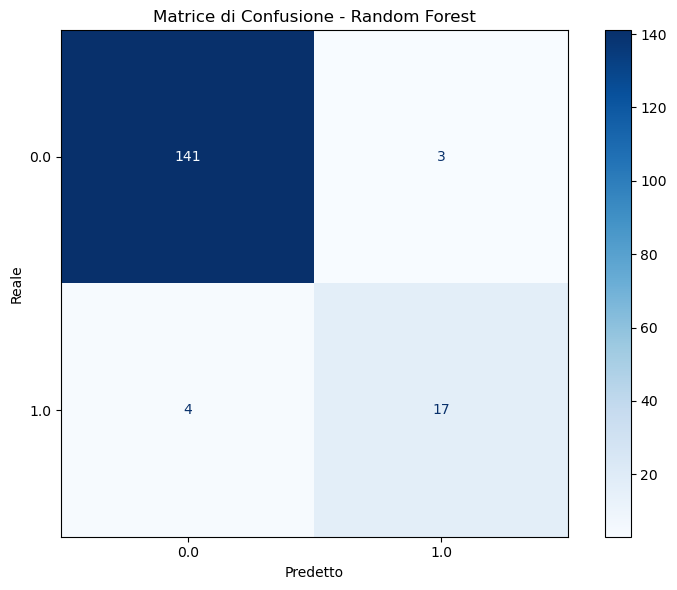

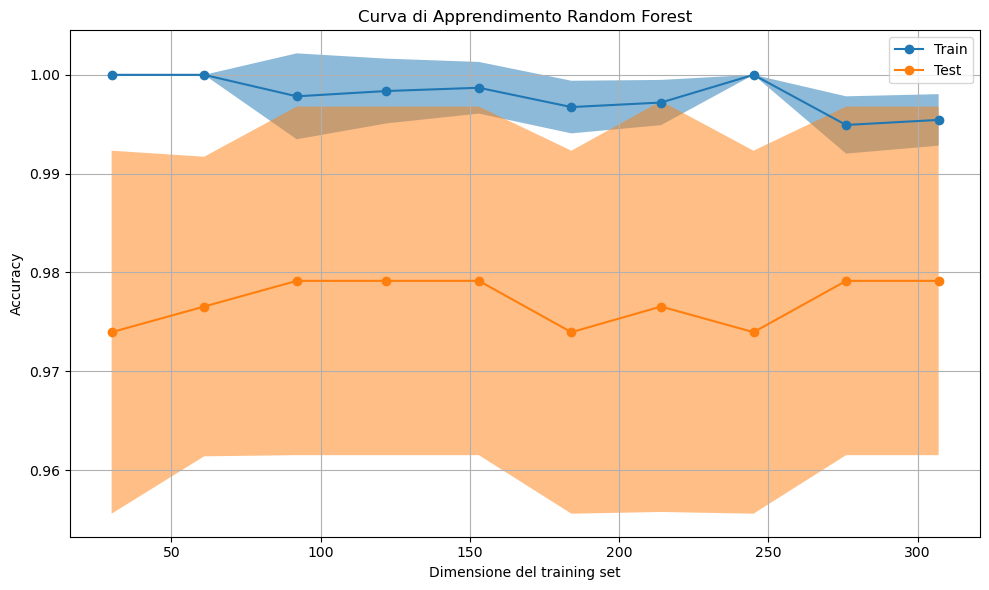

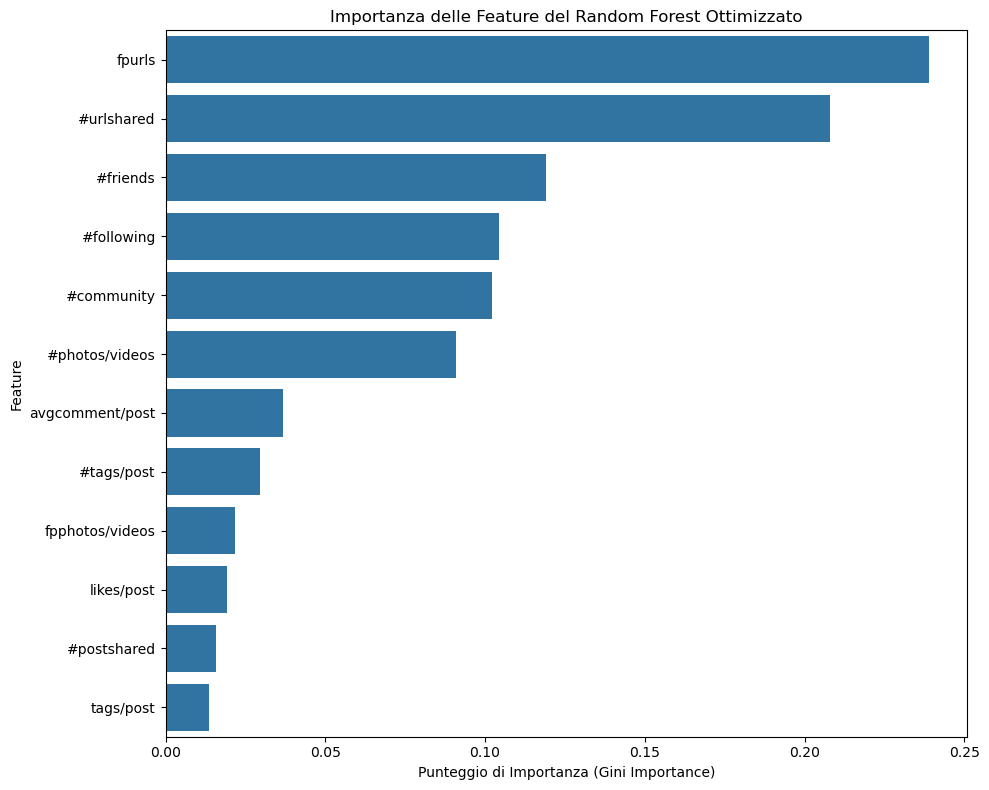

In [19]:
from sklearn.ensemble import RandomForestClassifier
# Definizione della griglia di iperparametri da esplorare
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [3, 5, 10],
    'max_features': ['log2', 'sqrt']
}

# Inizializzazione del modello base Random Forest
rf = RandomForestClassifier(random_state=15)

# Configurazione dello strumento GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Metrica di valutazione: accuratezza
    n_jobs=-1,            # Utilizza tutti i core disponibili
    verbose=1             # Output del progresso
)


grid_search.fit(X_train, y_train)

X_train, X_test, y_train, y_test
print("\nMigliori Iperparametri Trovati")
# Identifica e stampa i migliori iperparametri e il loro punteggio
print("Parametri Ottimali:", grid_search.best_params_)
print(f"   Accuratezza CV Ottimale: {grid_search.best_score_:.4f}")
print("Ottimizzazione completata. Modello migliore recuperato.\n")

# Valutazione Finale sul Test Set
print("Valutazione Finale del Modello")

# Recupera il modello migliore già addestrato (con i parametri ottimali)
model_forest = grid_search.best_estimator_

# Valuta il modello migliore sul set di test SCALATO
accuracy_rf = model_forest.score(X_test, y_test)
print(f" Accuratezza sul Set di Test (dati mai visti): {accuracy_rf:.4f}")

# Genera le previsioni sul test set scalato
y_pred = model_forest.predict(X_test)

print("\nReport di Classificazione Dettagliato")
print(classification_report(y_test, y_pred))

# Matrice di Confusione
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d', ax=plt.gca()) # Usa ax=plt.gca() per evitare deprecation warning in alcune versioni
plt.title('Matrice di Confusione - Random Forest')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.tight_layout()
plt.show()


# Generazione della Learning Curve
validation_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

fig, ax = plt.subplots(figsize=(10, 6))
LearningCurveDisplay.from_estimator(model_forest, ax=ax, **validation_params)

ax.set_title("Curva di Apprendimento Random Forest")
ax.set_xlabel("Dimensione del training set")
ax.set_ylabel("Accuracy")
ax.legend(loc='best')
ax.grid(True)
plt.tight_layout()
plt.show()

# Grafico Feature Importance
importances = model_forest.feature_importances_
feature_names = feature_cols# Usa i nomi delle colonne dai dati scalati
feature_importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance_series, y=feature_importance_series.index)
plt.title('Importanza delle Feature del Random Forest Ottimizzato')
plt.xlabel('Punteggio di Importanza (Gini Importance)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Train: (384, 12), Test: (165, 12)
Fitting 5 folds for each of 336 candidates, totalling 1680 fits

Best hyperparameters found:
{'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Best CV Accuracy: 0.9791

Classification report on test set:
              precision    recall  f1-score   support

         0.0    0.96053   0.99320   0.97659       147
         1.0    0.92308   0.66667   0.77419        18

    accuracy                        0.95758       165
   macro avg    0.94180   0.82993   0.87539       165
weighted avg    0.95644   0.95758   0.95451       165

0.9575757575757575


/Users/surro/Downloads/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


<Figure size 800x600 with 0 Axes>

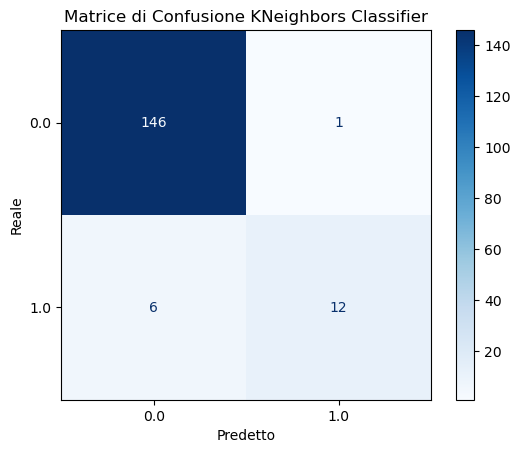

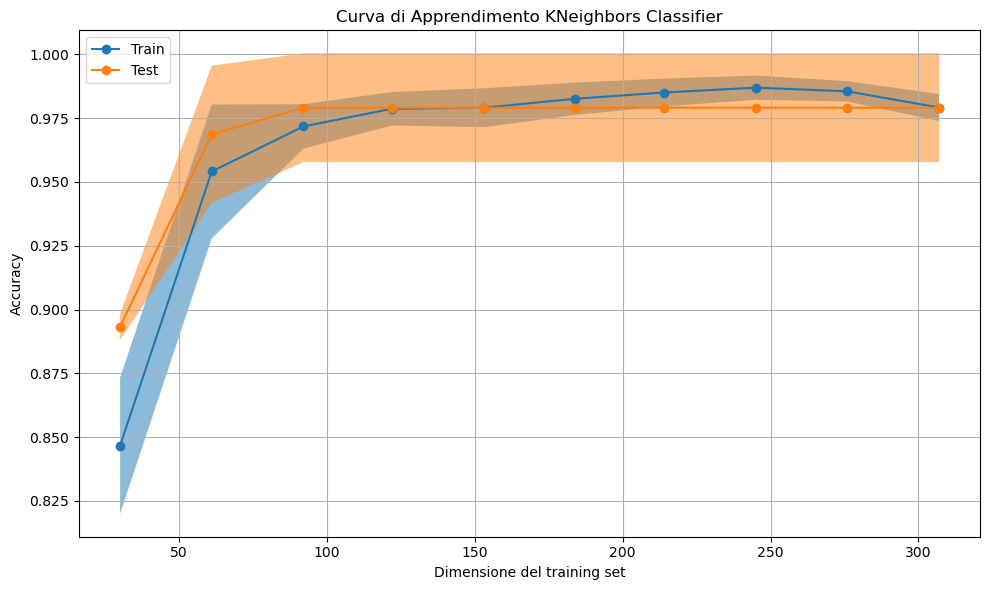

In [20]:
from sklearn.neighbors import KNeighborsClassifier

#Inilizzazione parametri
feature_cols = ['#friends', '#following', '#community', '#postshared', '#urlshared', 
                '#photos/videos', 'avgcomment/post', 'likes/post', 'tags/post', '#tags/post', 'fpurls', 'fpphotos/videos']

X = training_clean[feature_cols].values
y = training_clean['Label'].values

# Normalizzazione
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split sul set normalizzato
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_scaled, y, test_size = 0.3, random_state = 15, stratify = y)


print(f"Train: {X_train.shape}, Test: {X_test.shape}")

param_grid = {
    'n_neighbors': [10, 15, 20, 25, 30, 35, 40],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan'], 
    'leaf_size': [20, 30, 40, 50]
}

# Inizializzazione del modello base Random Forest
knn = KNeighborsClassifier()

# Configurazione dello strumento GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Metrica di valutazione: accuratezza
    n_jobs=-1,            # Utilizza tutti i core disponibili
    verbose=1             # Output del progresso
)

# Esecuzione della ricerca sugli iper-parametri
grid_search.fit(X_trainS, y_trainS)

# Iperparametri ottimali
print("\nBest hyperparameters found:")
print(grid_search.best_params_)
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# Valutazione sul test set
y_pred = grid_search.predict(X_testS)
print("\nClassification report on test set:")
print(classification_report(y_testS, y_pred, digits=5))

knn_model = grid_search.best_estimator_

print(knn_model.score(X_testS, y_testS))

#Confusion Matrix
cm = confusion_matrix(y_testS, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_testS))
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice di Confusione KNeighbors Classifier")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.show()

validation_params = {
    "X": X_trainS,
    "y": y_trainS,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

fig, ax = plt.subplots(figsize=(10, 6))
LearningCurveDisplay.from_estimator(estimator = knn_model, ax=ax, **validation_params)

ax.set_title("Curva di Apprendimento KNeighbors Classifier")
ax.set_xlabel("Dimensione del training set")
ax.set_ylabel("Accuracy")
ax.legend(loc='best')
ax.grid(True)
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Risultati Cross-Validation:
{'var_smoothing': 1e-09} -> Mean CV Accuracy: 0.97908 (±0.02130)
{'var_smoothing': 5e-09} -> Mean CV Accuracy: 0.97908 (±0.02130)
{'var_smoothing': 1e-08} -> Mean CV Accuracy: 0.97908 (±0.02130)
{'var_smoothing': 5e-08} -> Mean CV Accuracy: 0.97908 (±0.02130)
{'var_smoothing': 1e-07} -> Mean CV Accuracy: 0.97908 (±0.02130)
{'var_smoothing': 5e-07} -> Mean CV Accuracy: 0.97908 (±0.02130)
{'var_smoothing': 1e-06} -> Mean CV Accuracy: 0.97908 (±0.02130)
{'var_smoothing': 5e-06} -> Mean CV Accuracy: 0.97908 (±0.02130)
{'var_smoothing': 1e-05} -> Mean CV Accuracy: 0.97908 (±0.02130)

Migliori hyperparametri trovati per GaussianNB:
{'var_smoothing': 1e-09}
Best CV Accuracy: 0.97908

Classification report sul test set (GaussianNB):
              precision    recall  f1-score   support

         0.0     0.9669    0.9932    0.9799       147
         1.0     0.9286    0.7222    0.8125        18

    accuracy 

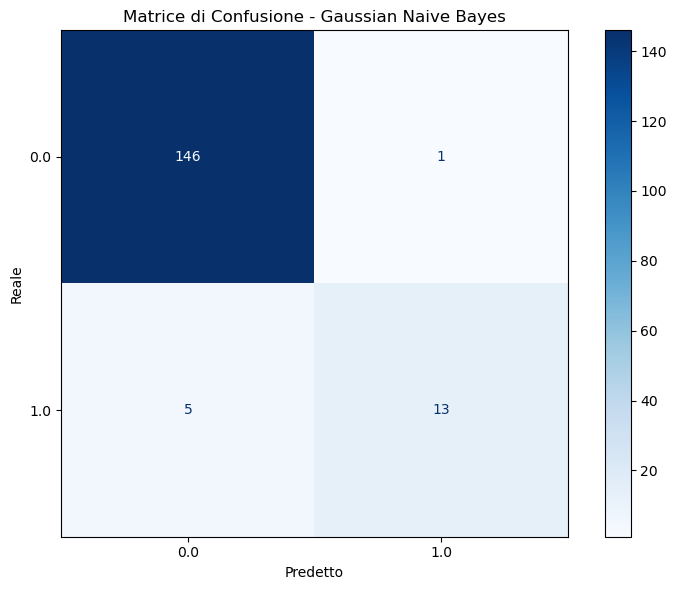

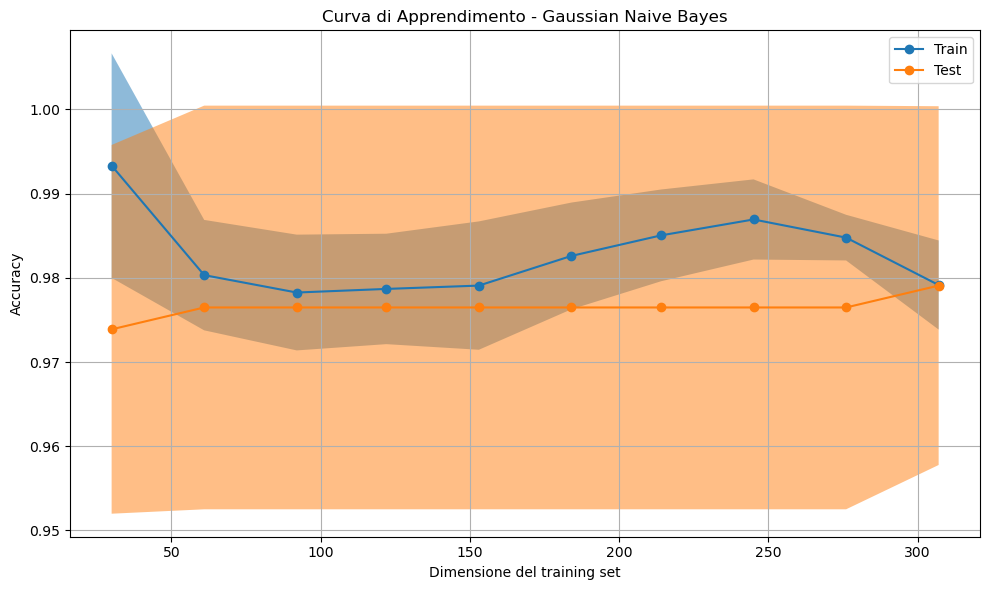

In [21]:
# ------------------------- Gaussian Naive Bayes con tuning -------------------------

# Griglia personalizzata per var_smoothing
param_grid_nb = {
    'var_smoothing': [1e-9, 5e-9, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5]
}

# Inizializza il classificatore
gnb = GaussianNB()

# GridSearchCV con validazione incrociata a 5 fold
grid_nb = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid_nb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Ricerca degli iperparametri
grid_nb.fit(X_trainS, y_trainS)

# Risultati delle combinazioni testate
results_nb = grid_nb.cv_results_
print("Risultati Cross-Validation:")
for mean_score, std_score, params in zip(
        results_nb['mean_test_score'],
        results_nb['std_test_score'],
        results_nb['params']):
    print(f"{params} -> Mean CV Accuracy: {mean_score:.5f} (±{std_score:.5f})")

# Miglior modello trovato
print("\nMigliori hyperparametri trovati per GaussianNB:")
print(grid_nb.best_params_)
print(f"Best CV Accuracy: {grid_nb.best_score_:.5f}")

# --------------------------- Valutazione sul test set ---------------------------

# Predizione
model_Bayes = grid_nb.best_estimator_
y_pred_nb = model_Bayes.predict(X_testS)

# Report
print("\nClassification report sul test set (GaussianNB):")
print(classification_report(y_testS, y_pred_nb, digits=4))

# Accuratezza
accuracy_NB = model_Bayes.score(X_testS, y_testS)
print(f"Accuracy su test set: {accuracy_NB:.4f}")

# Matrice di confusione
cm = confusion_matrix(y_testS, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_testS))
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Matrice di Confusione - Gaussian Naive Bayes')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.tight_layout()
plt.show()

# --------------------------- Curva di apprendimento ---------------------------

# Parametri per la curva di apprendimento
validation_params = {
    "X": X_trainS,
    "y": y_trainS,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

fig, ax = plt.subplots(figsize=(10, 6))
LearningCurveDisplay.from_estimator(model_Bayes, ax=ax, **validation_params)
ax.set_title("Curva di Apprendimento - Gaussian Naive Bayes")
ax.set_xlabel("Dimensione del training set")
ax.set_ylabel("Accuracy")
ax.legend(loc='best')
ax.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
accuracies = {
    'Random Forest': accuracy_rf,
    'Logistic Regression': accuracy_lr,
    'Decision Tree': accuracy_dt,
    'Gaussian Naive Bayes': accuracy_NB
}

# Plot delle accuracy dei modelli per confronto
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.xlabel('Modello')
plt.title('Accuracy dei modelli a confronto')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print('Random Forest:', accuracy_rf, '\nLogistic Regression:', accuracy_lr, '\nDecision Tree:', accuracy_dt, '\nGaussian Naive Bayes:', accuracy_NB)